In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image
from torch.utils.data import DataLoader
import torchvision

DATA_PATH = "../../ISIC2017_resized/"
BATCH_SIZE = 5

# Preprocessed Reconstruction Data

In [2]:
from datasets import ReconstructionDataset

In [14]:
rec_loader = DataLoader(
    ReconstructionDataset(
        image_dir=DATA_PATH+"train_images/",
        transform=None,
        std=0.3,
    ),
    batch_size=BATCH_SIZE,
    shuffle=True,
)

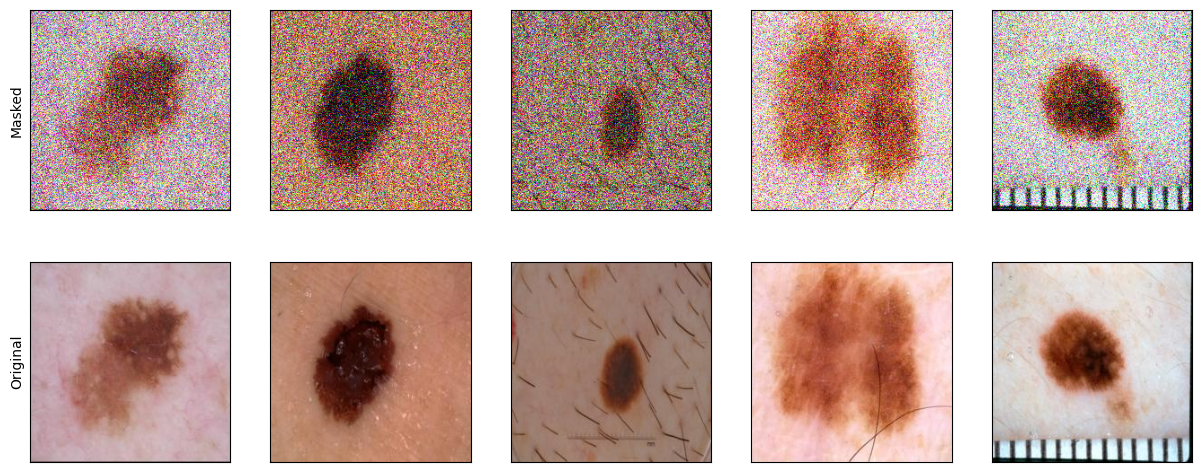

In [15]:
nimages = BATCH_SIZE
fig, axes = plt.subplots(nrows=2, ncols=nimages, figsize=(nimages*3,2*3), subplot_kw={'xticks': [], 'yticks': []})
for masked_images, images in rec_loader:
    axes[0, 0].set_ylabel("Masked")
    axes[1, 0].set_ylabel("Original")
    for i in range(BATCH_SIZE):
        axes[0, i].imshow(to_pil_image(masked_images[i]))
        axes[1, i].imshow(to_pil_image(images[i]))
    plt.show()
    break

# Preprocessed Segmentation Data

In [2]:
# from datasets import SegmentationDataset
def tcmap(fg):
    """Custom colormap with transparent background."""
    from matplotlib import colors
    fg = colors.to_rgb(fg)
    bg = colors.to_rgb((0,0,0))
    cmap = colors.LinearSegmentedColormap.from_list('binary', (bg,fg), 256)
    cmap._init()
    cmap._lut[:,-1] = np.linspace(0, 1, cmap.N + 3)
    return cmap

## Training Set

In [3]:
from datasets import SegmentationDataset
transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomVerticalFlip(),
    torchvision.transforms.RandomRotation(45),
])

seg_data_loader_train = DataLoader(
    dataset=SegmentationDataset(
        image_dir= DATA_PATH+"train_images/",
        mask_dir=DATA_PATH+"train_seg_masks/",
        size=BATCH_SIZE,
        transform=transform,
    ),
    batch_size=BATCH_SIZE,
)

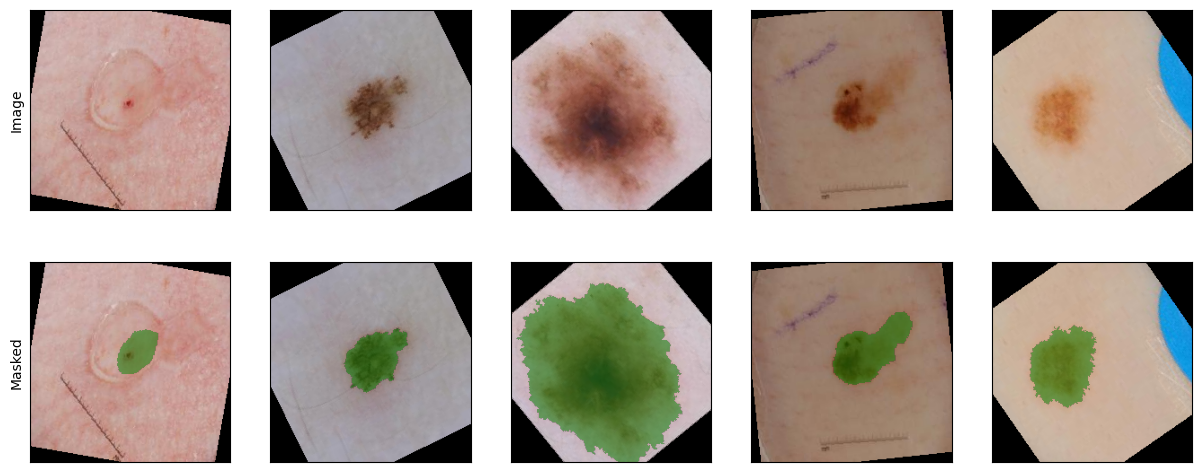

In [4]:
nimages = BATCH_SIZE
fig, axs = plt.subplots(nrows=2, ncols=nimages, figsize=(nimages*3,2*3), subplot_kw={'xticks': [], 'yticks': []})
axs[0,0].set_ylabel('Image')
axs[1,0].set_ylabel('Masked')
i = 0
for images, masks in seg_data_loader_train:
    for image, mask in zip(images, masks):
        if i >= nimages:
            break
        axs[0,i].imshow(image.numpy().transpose([1,2,0]))
        axs[1,i].imshow(image.numpy().transpose([1,2,0]))
        axs[1,i].imshow(mask[0].numpy(), cmap=tcmap('green'), alpha=0.5)
        i += 1
    break

## Validation Set

In [5]:
seg_data_loader_val = DataLoader(
    dataset=SegmentationDataset(
        image_dir= DATA_PATH+"val_images/",
        mask_dir=DATA_PATH+"val_seg_masks/",
        size=BATCH_SIZE
    ),
    batch_size=BATCH_SIZE,
)

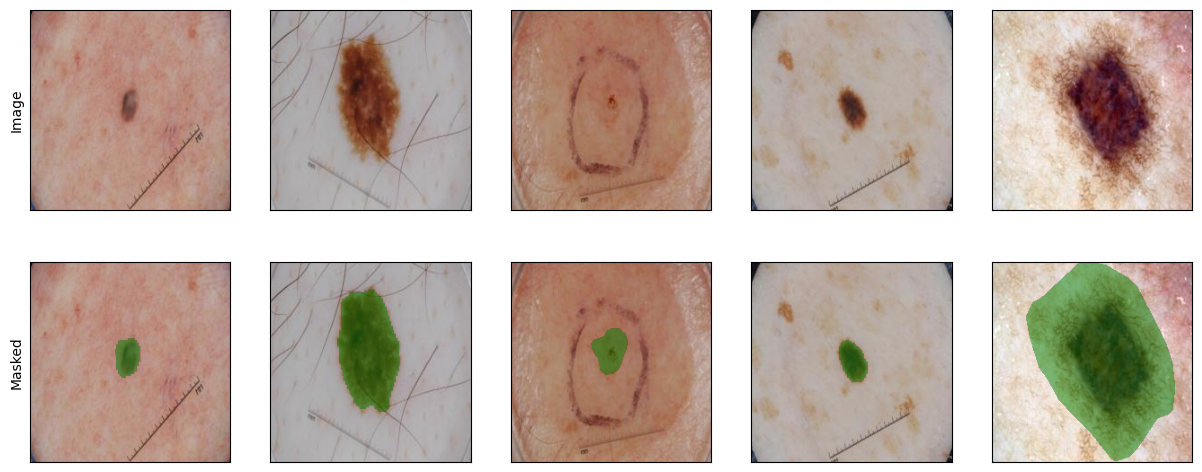

In [6]:
nimages = BATCH_SIZE
fig, axs = plt.subplots(nrows=2, ncols=nimages, figsize=(nimages*3,2*3), subplot_kw={'xticks': [], 'yticks': []})
axs[0,0].set_ylabel('Image')
axs[1,0].set_ylabel('Masked')
i = 0
for images, masks in seg_data_loader_val:
    for image, mask in zip(images, masks):
        if i >= nimages:
            break
        axs[0,i].imshow(image.numpy().transpose([1,2,0]))
        axs[1,i].imshow(image.numpy().transpose([1,2,0]))
        axs[1,i].imshow(mask[0].numpy(), cmap=tcmap('green'), alpha=0.5)
        i += 1

## Test Set

In [7]:
seg_data_loader_test = DataLoader(
    dataset=SegmentationDataset(
        image_dir= DATA_PATH+"test_images/",
        mask_dir=DATA_PATH+"test_seg_masks/",
        size=BATCH_SIZE
    ),
    batch_size=BATCH_SIZE,
)

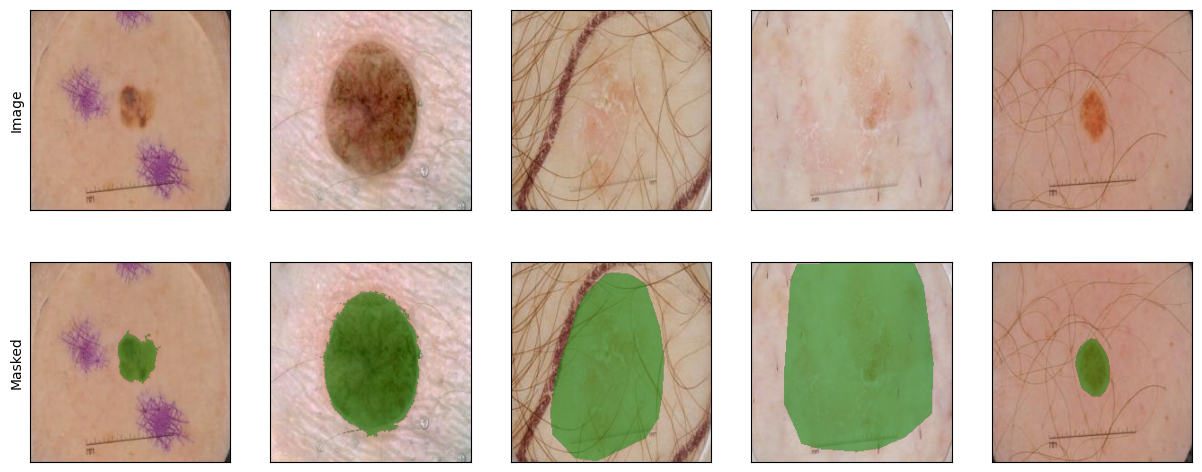

In [8]:
nimages = BATCH_SIZE
fig, axs = plt.subplots(nrows=2, ncols=nimages, figsize=(nimages*3,2*3), subplot_kw={'xticks': [], 'yticks': []})
axs[0,0].set_ylabel('Image')
axs[1,0].set_ylabel('Masked')
i = 0
for images, masks in seg_data_loader_test:
    for image, mask in zip(images, masks):
        if i >= nimages:
            break
        axs[0,i].imshow(image.numpy().transpose([1,2,0]))
        axs[1,i].imshow(image.numpy().transpose([1,2,0]))
        axs[1,i].imshow(mask[0].numpy(), cmap=tcmap('green'), alpha=0.5)
        i += 1

# Preprocessed Classication Data

In [11]:
from datasets import ClassificationDataset

## Traning Set

In [12]:
cls_data_loader_train = DataLoader(
    dataset=ClassificationDataset(
        image_dir= DATA_PATH+"train_images/",
        csv_path=DATA_PATH+"train_cls_GT.csv",
        ratio=1
    ),
    batch_size=BATCH_SIZE,
    shuffle=True,
)

In [13]:
for images, labels in cls_data_loader_train:
    num_images = BATCH_SIZE

    plt.figure(figsize=(15, 4))
    for i in range(num_images):
        img = images[i]
        img = to_pil_image(img.cpu())

        label_idx = int(labels[i])
        label_str = cls_data_loader_train.dataset.label_names[label_idx]

        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(label_str, fontsize=12)
        plt.axis("off")

    plt.tight_layout()
    plt.show()
    break

## Validation Set

In [14]:
cls_data_loader_val = DataLoader(
    dataset=ClassificationDataset(
        image_dir= DATA_PATH+"val_images/",
        csv_path=DATA_PATH+"val_cls_GT.csv",
        ratio=1
    ),
    batch_size=BATCH_SIZE,
    shuffle=True,
)

In [15]:
for images, labels in cls_data_loader_val:
    num_images = BATCH_SIZE

    plt.figure(figsize=(15, 4))
    for i in range(num_images):
        img = images[i]
        img = to_pil_image(img.cpu())

        label_idx = int(labels[i])
        label_str = cls_data_loader_train.dataset.label_names[label_idx]

        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(label_str, fontsize=12)
        plt.axis("off")

    plt.tight_layout()
    plt.show()
    break

## Test Set

In [16]:
cls_data_loader_test = DataLoader(
    dataset=ClassificationDataset(
        image_dir= DATA_PATH+"test_images/",
        csv_path=DATA_PATH+"test_cls_GT.csv",
        ratio=1
    ),
    batch_size=BATCH_SIZE,
    shuffle=True,
)

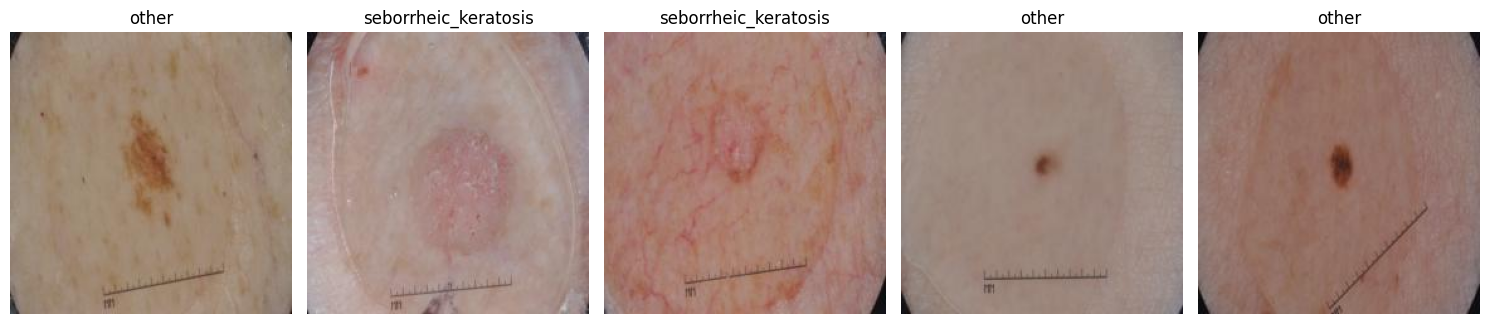

In [17]:
for images, labels in cls_data_loader_test:
    num_images = BATCH_SIZE

    plt.figure(figsize=(15, 4))
    for i in range(num_images):
        img = images[i]
        img = to_pil_image(img.cpu())

        label_idx = int(labels[i])
        label_str = cls_data_loader_train.dataset.label_names[label_idx]

        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(label_str, fontsize=12)
        plt.axis("off")

    plt.tight_layout()
    plt.show()
    break